CitiBike - 
Time Series Analysis 
Hourly data from January 2020 to Janauary 2021 (13 months)

In [1]:
import pandas as pd
import numpy as np
from pandas import to_datetime
import seaborn as sns
import matplotlib.pyplot as plt
import requests 
import json
from urllib.request import urlopen

In [2]:
url="https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/10001/2020-01-01/2020-12-31?unitGroup=metric&key=TMPL865Q4LLFFFBB5EAVWHCBH&contentType=json&&include=obs"
#url="https://weather.visualcrossing.com/VisualCrossingWebServices/rest/services/timeline/10001?unitGroup=metric&key=TMPL865Q4LLFFFBB5EAVWHCBH&contentType=json"

In [3]:
response=requests.get(url)
response.status_code

200

In [4]:
response=requests.get(url)
response.json().keys()
response.json()['days'][0]

{'datetime': '2020-01-01',
 'datetimeEpoch': 1577854800,
 'tempmax': 5.0,
 'tempmin': 1.7,
 'temp': 3.2,
 'feelslikemax': 1.5,
 'feelslikemin': -2.4,
 'feelslike': -0.4,
 'dew': -5.8,
 'humidity': 51.81,
 'precip': 0.0,
 'precipprob': None,
 'precipcover': 0.0,
 'preciptype': None,
 'snow': 0.0,
 'snowdepth': 0.0,
 'windgust': 47.9,
 'windspeed': 22.7,
 'winddir': 271.9,
 'pressure': 1007.4,
 'cloudcover': 80.4,
 'visibility': 16.0,
 'solarradiation': 97.4,
 'solarenergy': 3.5,
 'uvindex': 2.0,
 'sunrise': '07:20:12',
 'sunriseEpoch': 1577881212,
 'sunset': '16:38:46',
 'sunsetEpoch': 1577914726,
 'moonphase': 0.17,
 'conditions': 'Partially cloudy',
 'description': 'Partly cloudy throughout the day.',
 'icon': 'partly-cloudy-day',
 'stations': ['72502594741',
  '72505394728',
  'KTEB',
  'KLGA',
  'KNYC',
  'F1417',
  '72503014732'],
 'source': 'obs'}

In [5]:
dfweather=pd.DataFrame(response.json()['days'])
dfweather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 36 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   datetime        366 non-null    object 
 1   datetimeEpoch   366 non-null    int64  
 2   tempmax         366 non-null    float64
 3   tempmin         366 non-null    float64
 4   temp            366 non-null    float64
 5   feelslikemax    366 non-null    float64
 6   feelslikemin    366 non-null    float64
 7   feelslike       366 non-null    float64
 8   dew             366 non-null    float64
 9   humidity        366 non-null    float64
 10  precip          366 non-null    float64
 11  precipprob      0 non-null      object 
 12  precipcover     366 non-null    float64
 13  preciptype      0 non-null      object 
 14  snow            366 non-null    float64
 15  snowdepth       366 non-null    float64
 16  windgust        308 non-null    float64
 17  windspeed       366 non-null    flo

In [6]:
dfweather[['datetime','tempmax','tempmin','temp','humidity',\
'precip','snow','windgust','windspeed','visibility']].head(10)

,datetime,tempmax,tempmin,temp,humidity,precip,snow,windgust,windspeed,visibility
0,2020-01-01,5.0,1.7,3.2,51.81,0.00,0.00,47.9,22.7,16.0
1,2020-01-02,9.4,1.0,5.3,51.59,0.00,0.00,29.5,17.2,16.0
2,2020-01-03,9.4,6.7,8.2,79.53,3.43,0.00,NaN,11.0,12.4
3,2020-01-04,10.5,6.2,8.9,90.59,5.72,0.00,43.3,15.9,8.5
4,2020-01-05,5.6,2.0,3.7,50.49,0.00,1.88,63.3,35.4,16.0
5,2020-01-06,6.8,0.0,3.6,63.24,1.03,1.12,51.5,18.6,14.2
6,2020-01-07,6.7,2.8,4.5,48.76,0.00,0.00,44.4,16.6,15.6
7,2020-01-08,5.0,-1.1,1.6,57.51,0.00,0.00,50.5,28.0,15.3
8,2020-01-09,0.7,-4.9,-1.8,39.72,0.00,0.00,55.8,33.1,16.0
9,2020-01-10,12.2,0.6,7.1,67.16,0.00,0.00,33.5,16.6,16.0


In [7]:
dfweather['datetime'] = pd.to_datetime(dfweather['datetime'],format='%Y-%m-%d') 
dfweather['day'] = dfweather['datetime'].dt.day
dfweather.tail(10)

,datetime,datetimeEpoch,tempmax,tempmin,temp,feelslikemax,feelslikemin,feelslike,dew,humidity,...,sunset,sunsetEpoch,moonphase,conditions,description,icon,stations,source,tzoffset,day
356,2020-12-22,1608613200,7.3,3.4,5.4,5.2,0.4,3.0,-1.5,62.92,...,16:32:22,1608672742,0.28,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,22
357,2020-12-23,1608699600,7.2,2.8,4.7,6.2,-0.2,2.7,-4.7,51.29,...,16:32:56,1608759176,0.32,Clear,Clear conditions throughout the day.,snow,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,23
358,2020-12-24,1608786000,15.1,6.0,12.0,15.1,3.7,11.6,8.0,76.77,...,16:33:31,1608845611,0.37,"Snow, Partially cloudy",Partly cloudy throughout the day with snow.,snow,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,24
359,2020-12-25,1608872400,16.1,-1.0,9.8,16.1,-6.3,8.1,6.7,81.47,...,16:34:09,1608932049,0.40,"Rain, Overcast",Cloudy skies throughout the day with a chance ...,rain,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,25
360,2020-12-26,1608958800,0.1,-4.3,-2.2,-3.5,-11.8,-7.5,-10.9,51.67,...,16:34:49,1609018489,0.44,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,26
361,2020-12-27,1609045200,2.9,-4.2,-0.5,2.9,-8.8,-2.8,-9.0,53.52,...,16:35:30,1609104930,0.47,Clear,Clear conditions throughout the day.,clear-day,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,27
362,2020-12-28,1609131600,10.0,1.6,6.7,10.0,-0.7,5.1,-0.9,58.88,...,16:36:14,1609191374,0.49,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,28
363,2020-12-29,1609218000,6.2,-0.6,2.7,3.8,-4.5,-1.0,-9.2,41.71,...,16:36:59,1609277819,0.50,Partially cloudy,Partly cloudy throughout the day.,partly-cloudy-day,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,29
364,2020-12-30,1609304400,5.7,-2.1,1.8,4.4,-5.5,-0.7,-7.8,49.36,...,16:37:46,1609364266,0.50,Clear,Clear conditions throughout the day.,clear-day,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,30
365,2020-12-31,1609390800,8.8,2.3,6.1,7.4,0.0,4.1,0.5,68.56,...,16:38:34,1609450714,0.51,"Rain, Partially cloudy",Partly cloudy throughout the day with a chance...,rain,"[72502594741, 72505394728, KTEB, KLGA, KNYC, F...",obs,NaN,31


In [8]:
dfcount = pd.read_csv("timeseriesdatamonth.csv")
dfcount = dfcount.rename(columns={'date': 'datetime'})
dfcount['datetime'] = pd.to_datetime(dfcount['datetime'],format='%Y-%m-%d') 
dfcount.head()

,datetime,count
0,2020-01-01,18114
1,2020-01-02,41556
2,2020-01-03,31873
3,2020-01-04,29436
4,2020-01-05,27589


In [9]:
dfcount.tail(10)

,datetime,count
356,2020-12-22,37256
357,2020-12-23,40454
358,2020-12-24,32606
359,2020-12-25,11850
360,2020-12-26,19791
361,2020-12-27,23764
362,2020-12-28,38784
363,2020-12-29,33202
364,2020-12-30,35705
365,2020-12-31,26334


In [10]:
df = pd.merge(dfcount, dfweather, on='datetime', how = 'inner')

In [11]:
df.shape

(366, 38)

In [12]:
df.to_csv('2020dailycount_weatherdata.csv', index=False)

### Analysis of the weather data along with count

In [13]:
df.columns.unique()

Index(['datetime', 'count', 'datetimeEpoch', 'tempmax', 'tempmin', 'temp',
       'feelslikemax', 'feelslikemin', 'feelslike', 'dew', 'humidity',
       'precip', 'precipprob', 'precipcover', 'preciptype', 'snow',
       'snowdepth', 'windgust', 'windspeed', 'winddir', 'pressure',
       'cloudcover', 'visibility', 'solarradiation', 'solarenergy', 'uvindex',
       'sunrise', 'sunriseEpoch', 'sunset', 'sunsetEpoch', 'moonphase',
       'conditions', 'description', 'icon', 'stations', 'source', 'tzoffset',
       'day'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        366 non-null    datetime64[ns]
 1   count           366 non-null    int64         
 2   datetimeEpoch   366 non-null    int64         
 3   tempmax         366 non-null    float64       
 4   tempmin         366 non-null    float64       
 5   temp            366 non-null    float64       
 6   feelslikemax    366 non-null    float64       
 7   feelslikemin    366 non-null    float64       
 8   feelslike       366 non-null    float64       
 9   dew             366 non-null    float64       
 10  humidity        366 non-null    float64       
 11  precip          366 non-null    float64       
 12  precipprob      0 non-null      object        
 13  precipcover     366 non-null    float64       
 14  preciptype      0 non-null      object        
 15  snow  

### Variation/Histograms of different weather conditions 

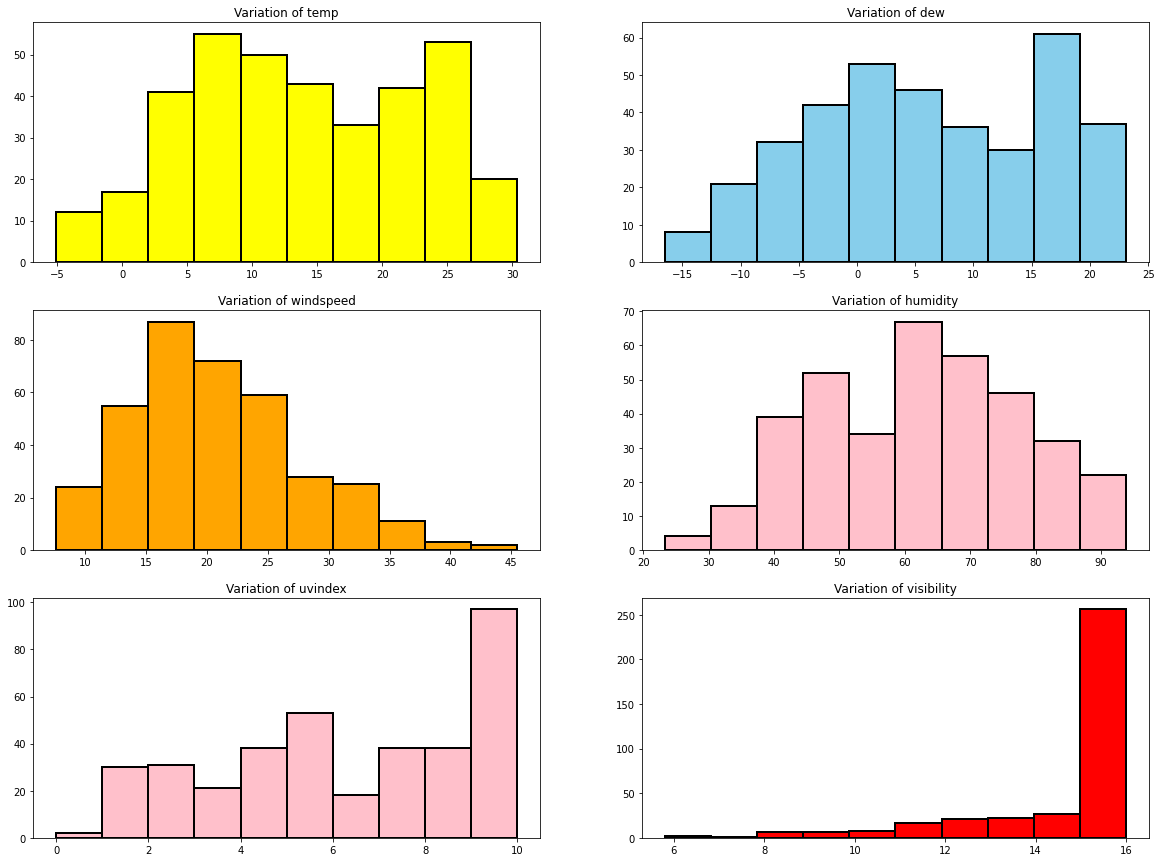

In [15]:
#variation 
fig,axes=plt.subplots(3,2)
axes[0,0].hist(x="temp",data=df,edgecolor="black",linewidth=2,color='yellow')
axes[0,0].set_title("Variation of temp")
axes[0,1].hist(x="dew",data=df,edgecolor="black",linewidth=2,color='skyblue')
axes[0,1].set_title("Variation of dew")

axes[1,0].hist(x="windspeed",data=df,edgecolor="black",linewidth=2,color='orange')
axes[1,0].set_title("Variation of windspeed")
axes[1,1].hist(x="humidity",data=df,edgecolor="black",linewidth=2,color='pink')
axes[1,1].set_title("Variation of humidity")

axes[2,0].hist(x="uvindex",data=df,edgecolor="black",linewidth=2,color='pink')
axes[2,0].set_title("Variation of uvindex")
axes[2,1].hist(x="visibility",data=df,edgecolor="black",linewidth=2,color='red')
axes[2,1].set_title("Variation of visibility")

fig.set_size_inches(20,15)

In [16]:
df.visibility.unique()

array([16. , 12.4,  8.5, 14.2, 15.6, 15.3, 14.9, 11. , 13.6, 12.6, 15.7,
       11.9, 15.9, 15.1, 11.3, 15.8, 10.8, 13.1, 15.4,  6.4,  9.9, 12.9,
        8.9,  8.6, 12.5, 11.6,  9.1, 13.7, 13.3, 11.1, 12. , 10.1, 13.2,
        5.8, 15. , 14.8, 13.5, 15.5, 14.5,  9.4, 14.6, 12.3, 14.4, 14.1,
       13.8, 12.7, 14.3, 10. , 13. , 12.8, 13.4, 14.7,  8.7,  9.5, 12.1,
        9.2,  8. ,  7.6, 11.7, 10.2, 10.4, 10.9,  8.1, 12.2, 11.2])

### Correlation

<AxesSubplot:>

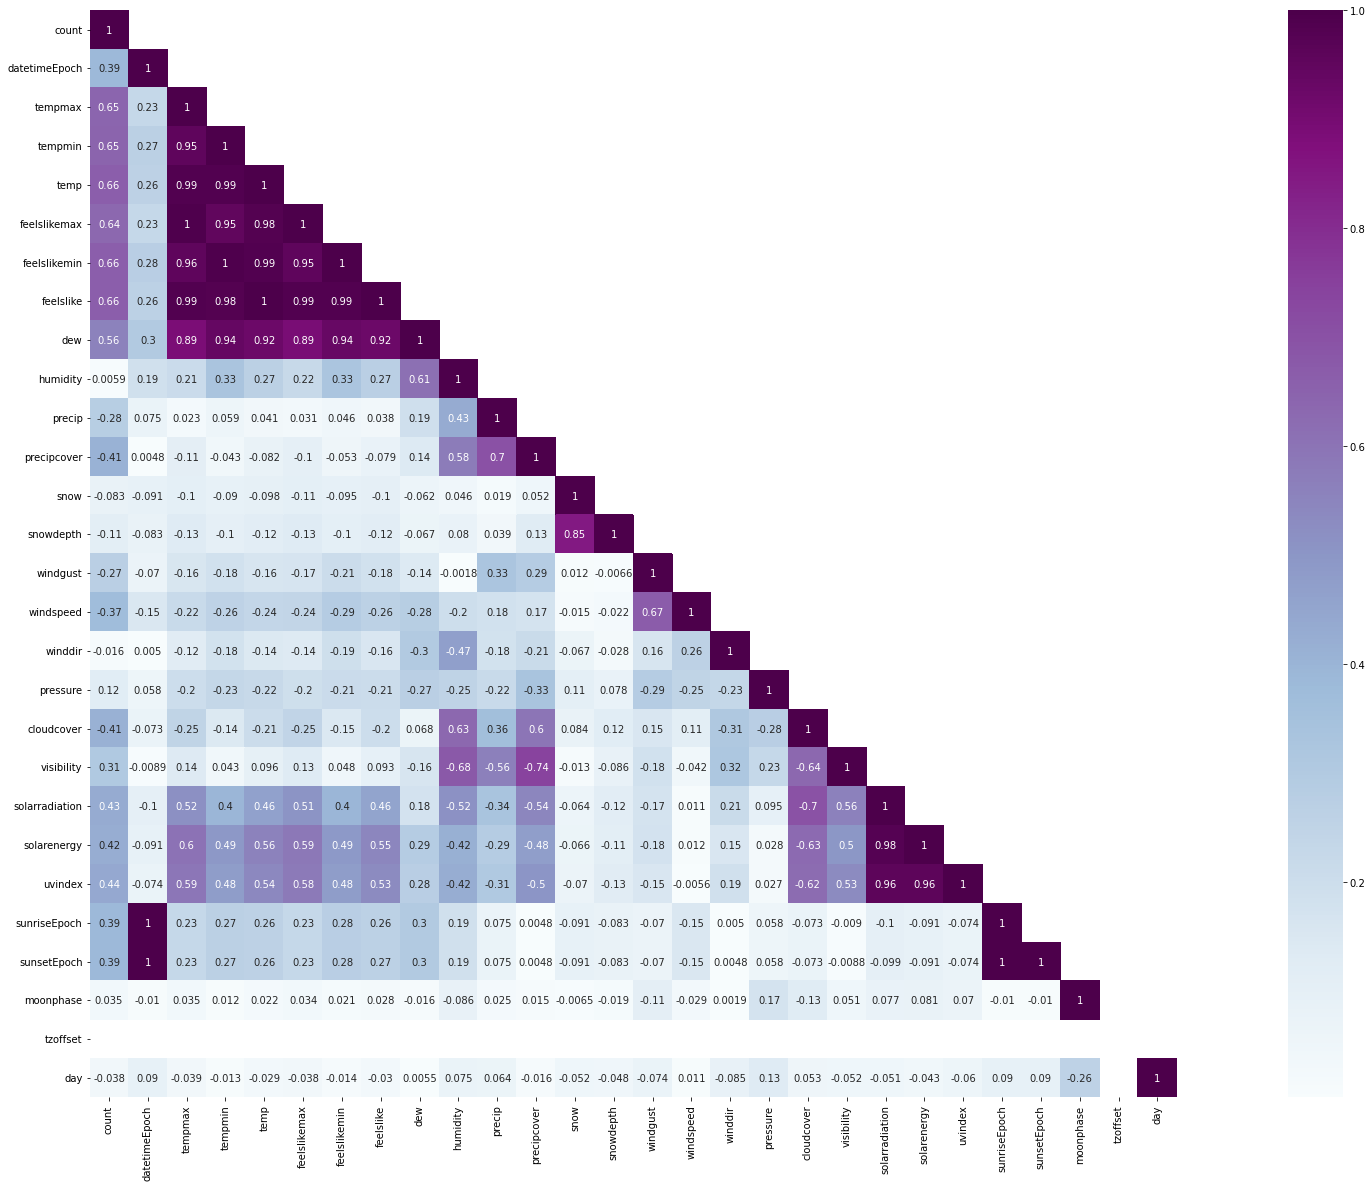

In [17]:
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(40,20)
sns.heatmap(data=np.abs(cor_mat),mask=mask,square=True,annot=cor_mat,cbar=True,cmap='BuPu')

<AxesSubplot:>

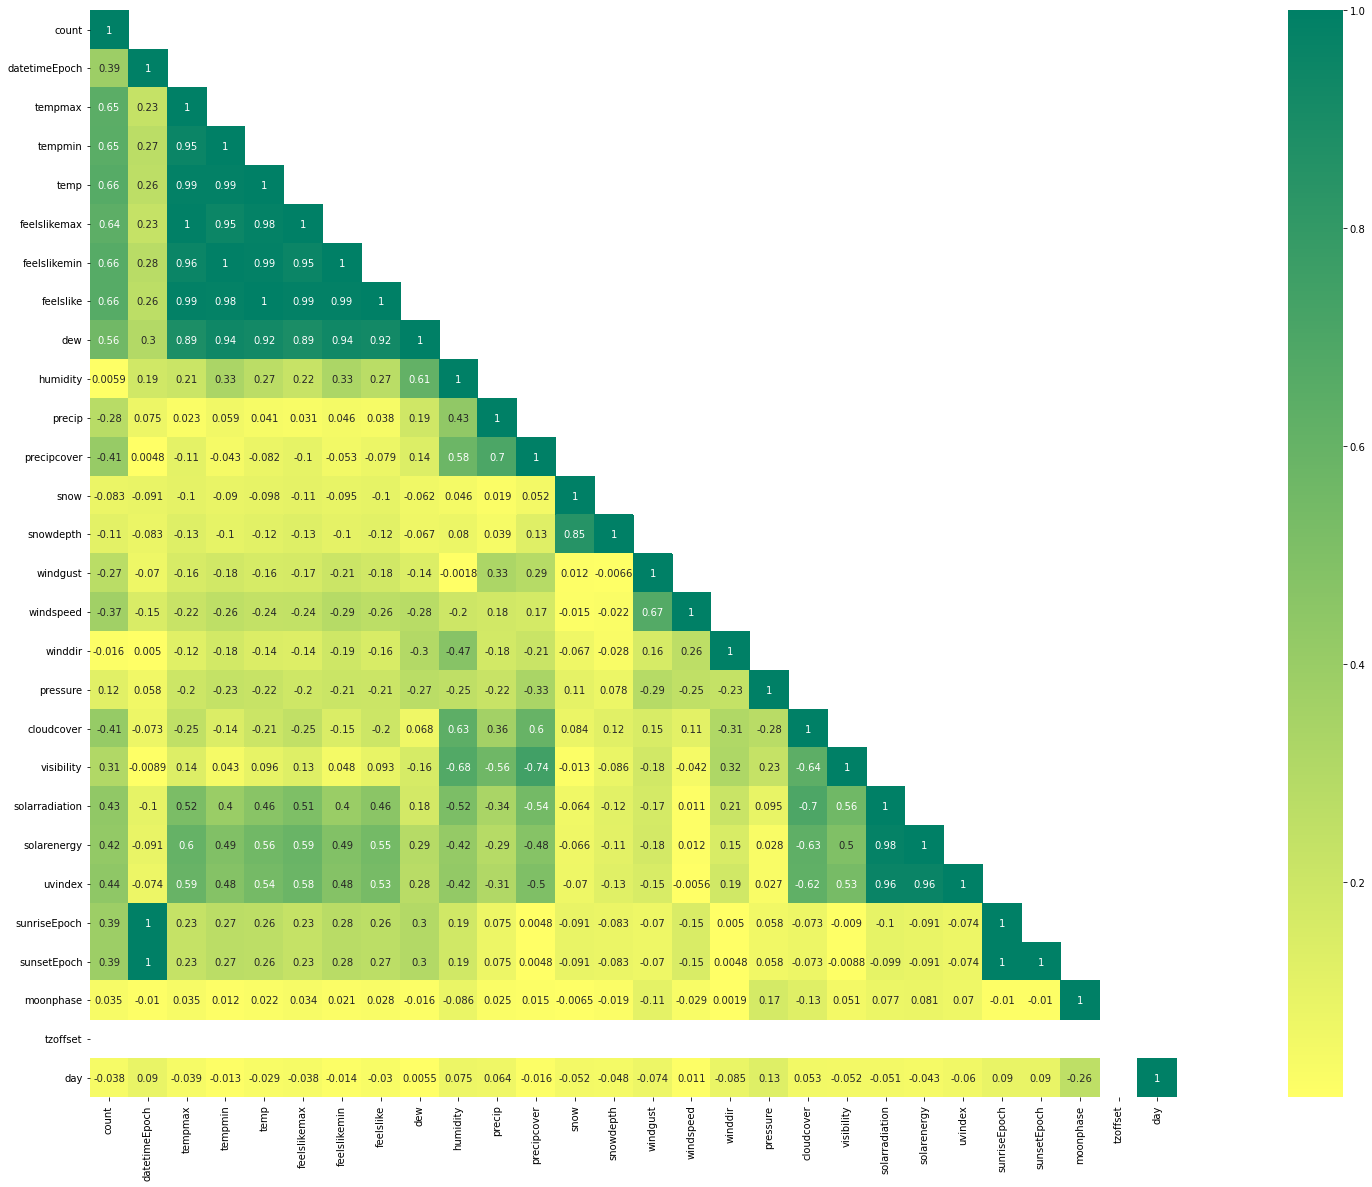

In [35]:
#corelation matrix.
cor_mat= df[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(40,20)
sns.heatmap(data=np.abs(cor_mat),mask=mask,square=True,annot=cor_mat,cbar=True,cmap='summer_r')

In [19]:
sns.color_palette('summer_r')

[(0.8588235294117648, 0.9294117647058824, 0.4),
 (0.7137254901960784, 0.8568627450980393, 0.4),
 (0.5725490196078431, 0.7862745098039216, 0.4),
 (0.4274509803921569, 0.7137254901960784, 0.4),
 (0.28627450980392155, 0.6431372549019607, 0.4),
 (0.14117647058823535, 0.5705882352941176, 0.4)]

In [37]:
sns.color_palette("Purples")

[(0.9265974625144175, 0.919769319492503, 0.9557093425605536),
 (0.8207612456747405, 0.8218992695117262, 0.9044982698961938),
 (0.6878892733564014, 0.6835832372164552, 0.829834678969627),
 (0.5513264129181085, 0.537916186082276, 0.7524490580545944),
 (0.440722798923491, 0.36772010765090346, 0.6653902345251825),
 (0.3405767012687428, 0.1742560553633218, 0.5709342560553633)]

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 366 entries, 0 to 365
Data columns (total 38 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   datetime        366 non-null    datetime64[ns]
 1   count           366 non-null    int64         
 2   datetimeEpoch   366 non-null    int64         
 3   tempmax         366 non-null    float64       
 4   tempmin         366 non-null    float64       
 5   temp            366 non-null    float64       
 6   feelslikemax    366 non-null    float64       
 7   feelslikemin    366 non-null    float64       
 8   feelslike       366 non-null    float64       
 9   dew             366 non-null    float64       
 10  humidity        366 non-null    float64       
 11  precip          366 non-null    float64       
 12  precipprob      0 non-null      object        
 13  precipcover     366 non-null    float64       
 14  preciptype      0 non-null      object        
 15  snow  

In [26]:
dfcon = df[['count','datetime','temp','feelslike','humidity','cloudcover','uvindex','solarradiation','windspeed','dew']]

<AxesSubplot:>

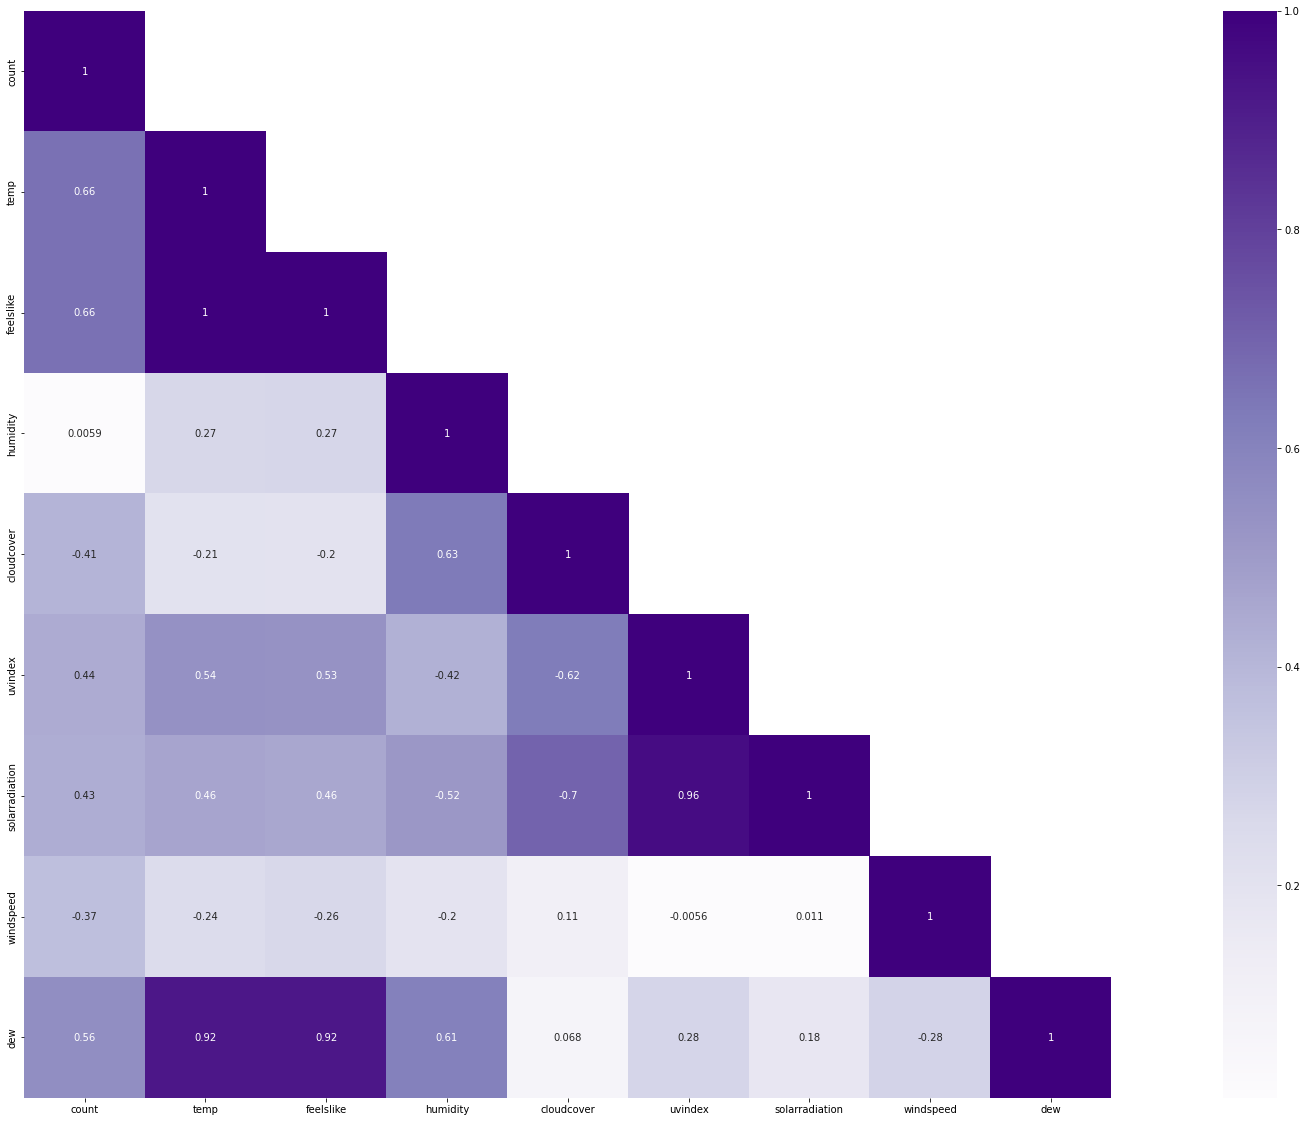

In [38]:
#corelation matrix.
cor_mat= dfcon[:].corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig=plt.gcf()
fig.set_size_inches(40,20)
sns.heatmap(data=np.abs(cor_mat),mask=mask,square=True,annot=cor_mat,cbar=True,cmap='Purples')

In [39]:
dataset = dfcon[['count','datetime','temp','feelslike','cloudcover','uvindex','solarradiation','dew']]

In [46]:
trainset = dataset[['temp','feelslike','cloudcover','uvindex','solarradiation','dew']]

In [40]:
dataset.head()

,count,datetime,temp,feelslike,cloudcover,uvindex,solarradiation,dew
0,18114,2020-01-01,3.2,-0.4,80.4,2.0,97.4,-5.8
1,41556,2020-01-02,5.3,3.3,7.8,4.0,200.7,-4.1
2,31873,2020-01-03,8.2,7.4,84.9,1.0,41.4,4.8
3,29436,2020-01-04,8.9,7.9,87.0,1.0,33.4,7.4
4,27589,2020-01-05,3.7,-0.4,63.7,5.0,215.3,-5.8


In [63]:
## Regression - #Linear
#regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
#evaluation metrics
from sklearn.metrics import mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error # for regression
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,mean_squared_log_error,mean_squared_error, r2_score,mean_absolute_error

In [103]:
X_train,X_test,y_train,y_test=train_test_split(trainset,dataset['count'],test_size=0.2,random_state=81)

In [104]:
lr =LinearRegression()
lr.fit(X_train, y_train)
pred_lr  = lr.predict(X_test)

print(lr.score(X_train,y_train))
print(lr.score(X_test,y_test))

0.5657042703167664
0.3937799007878049


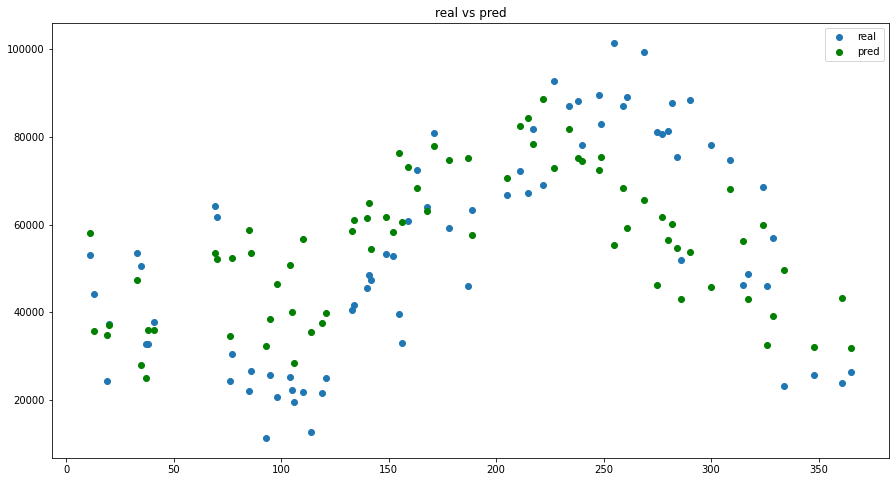

In [105]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test.index, y_test, label="real")
plt.scatter(y_test.index, pred_lr,color='green', label="pred")
plt.title('real vs pred')
plt.legend()
plt.show()

In [106]:
print(f"Test MSE for Linear Regression: {mean_squared_error(y_test, pred_lr):4.3f}")
print(f"Test RMSE for Linear Regression: {np.sqrt(mean_squared_error(y_test, pred_lr)):4.3f}")
print(f"Test R^2 for the Linear Regression:model: {r2_score(y_test, pred_lr):4.3f}")

Test MSE for Linear Regression: 361996434.249
Test RMSE for Linear Regression: 19026.204
Test R^2 for the Linear Regression:model: 0.394


In [107]:
# Random Forest
no_of_test=[500,1000]
params_dict={'n_estimators':no_of_test,'n_jobs':[-1],'max_depth':[8,10]}
clf_rf=GridSearchCV(estimator=RandomForestRegressor(),param_grid=params_dict,scoring='r2',cv=5)
clf_rf.fit(X_train,y_train)
pred_rf=clf_rf.predict(X_test)

In [108]:
print(f"Test MSE for random forest: {mean_squared_error(y_test, pred_rf):4.3f}")
print(f"Test RMSE for random forest: {np.sqrt(mean_squared_error(y_test, pred_rf)):4.3f}")
print(f"Test R^2 for the random forest model: {r2_score(y_test, pred_rf):4.3f}")

Test MSE for random forest: 283609502.687
Test RMSE for random forest: 16840.710
Test R^2 for the random forest model: 0.525


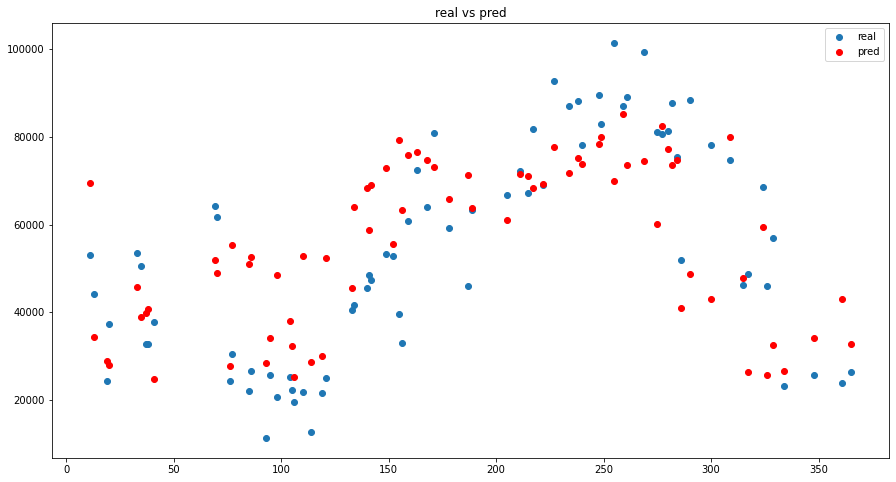

In [109]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test.index, y_test, label="real")
plt.scatter(y_test.index, pred_rf, color='red',label="pred")
plt.title('real vs pred')
plt.legend()
plt.show()

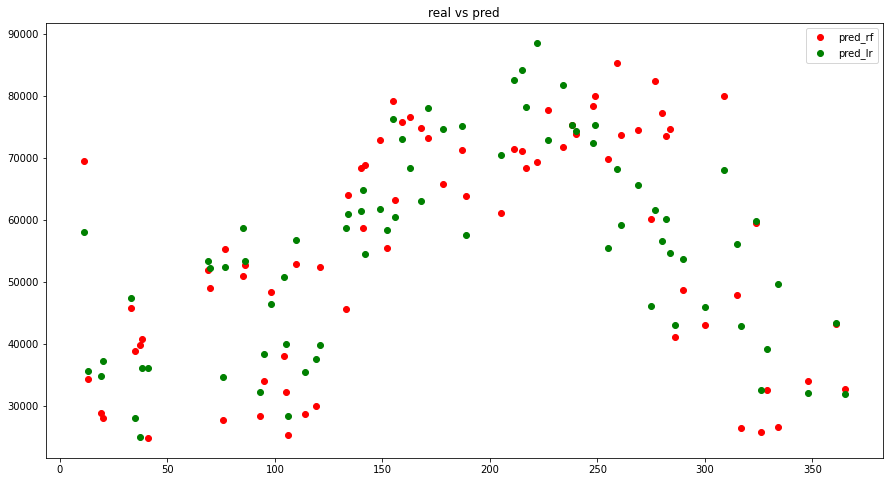

In [110]:
plt.figure(figsize=(15, 8))
plt.scatter(y_test.index, pred_rf, color='red',label="pred_rf")
plt.scatter(y_test.index, pred_lr, color='green',label="pred_lr")
plt.title('real vs pred')
plt.legend()
plt.show()